<a href="https://colab.research.google.com/github/sandrina10222040/kelompok_8_AS__/blob/main/Template_Analisis_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Penjelasan Dataset yang digunakan

In [2]:
import pandas as pd
df = pd.read_csv('kelompok_8_AS.csv', encoding='utf-8')
df.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

sns.set(style='whitegrid')


import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')


print("Semua library sudah siap digunakan! ✅")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Semua library sudah siap digunakan! ✅


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
df = pd.read_csv('kelompok_8_AS.csv', encoding='utf-8')

print("🧾 Informasi Dataset:")
print("- Jumlah baris dan kolom:", df.shape)
print("- Nama kolom:", df.columns.tolist())
print("\n📍 Contoh data:\n")
display(df.head())

print("\n📊 Informasi detail tiap kolom:")
print(df.info())


🧾 Informasi Dataset:
- Jumlah baris dan kolom: (7920, 3)
- Nama kolom: ['id', 'label', 'tweet']

📍 Contoh data:



,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...



📊 Informasi detail tiap kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB
None


In [5]:
df.head()


,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


## Data Understanding

In [7]:
print("Jumlah baris dan kolom data:", df.shape)

print("\nNama kolom:", df.columns.tolist())


Jumlah baris dan kolom data: (7920, 3)

Nama kolom: ['id', 'label', 'tweet']


Panjang rata-rata tweet: 128.92 karakter


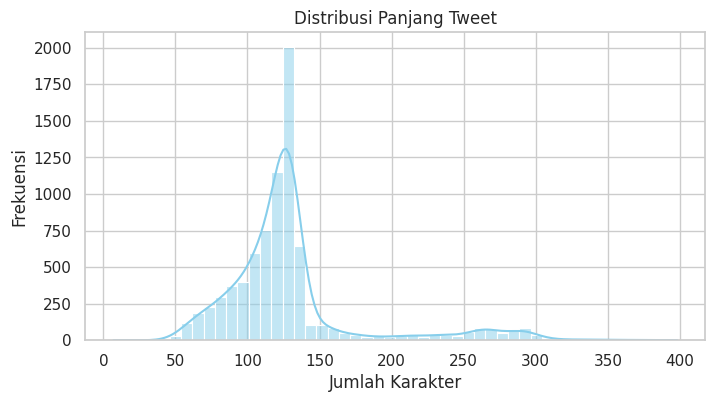

In [8]:
df['tweet_length'] = df['tweet'].apply(len)

rata2 = df['tweet_length'].mean()
print(f"Panjang rata-rata tweet: {rata2:.2f} karakter")

plt.figure(figsize=(8,4))
sns.histplot(df['tweet_length'], bins=50, color='skyblue', kde=True)
plt.title('Distribusi Panjang Tweet')
plt.xlabel('Jumlah Karakter')
plt.ylabel('Frekuensi')
plt.show()


In [9]:
duplikat = df.duplicated().sum()
print("Jumlah data duplikat:", duplikat)

df = df.drop_duplicates()


Jumlah data duplikat: 0


In [10]:
print("Jumlah nilai kosong di tiap kolom:\n")
print(df.isnull().sum())


Jumlah nilai kosong di tiap kolom:

id              0
label           0
tweet           0
tweet_length    0
dtype: int64


/tmp/ipython-input-3136409272.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='pastel')


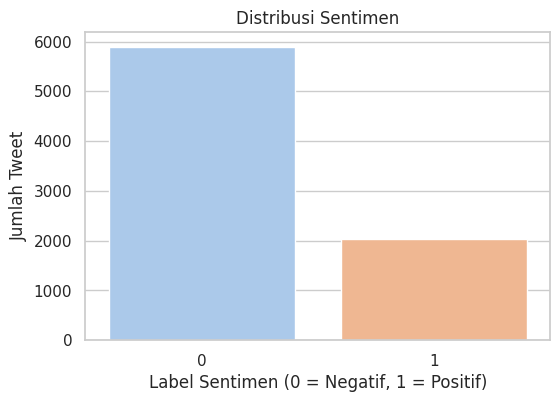

label
0    74.419192
1    25.580808
Name: proportion, dtype: float64


In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette='pastel')
plt.title('Distribusi Sentimen')
plt.xlabel('Label Sentimen (0 = Negatif, 1 = Positif)')
plt.ylabel('Jumlah Tweet')
plt.show()

print(df['label'].value_counts(normalize=True)*100)


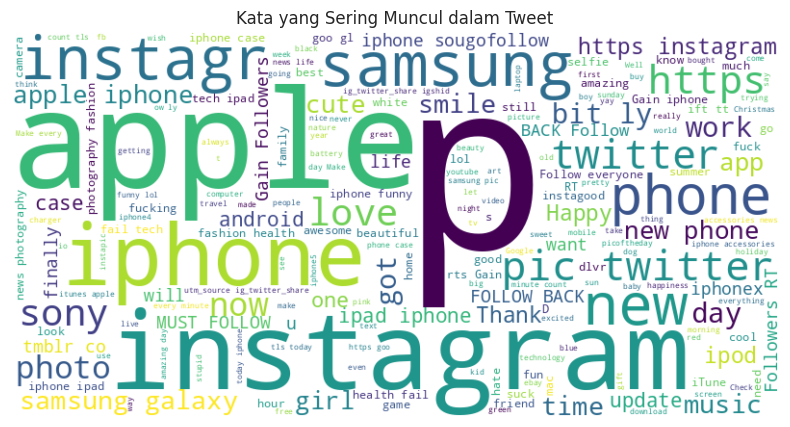

In [12]:
from wordcloud import WordCloud

text_all = ' '.join(df['tweet'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_all)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Kata yang Sering Muncul dalam Tweet')
plt.show()


## Data Text Processing

In [13]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

stemmer = PorterStemmer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\d+', '', text)
    text = text.strip()
    return text

df['clean_tweet'] = df['tweet'].apply(clean_text)

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

df['clean_tweet'] = df['clean_tweet'].apply(preprocess_text)

df[['tweet', 'clean_tweet']].head(10)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tweet,clean_tweet
0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnanc test android app beauti c...
1,Finally a transparant silicon case ^^ Thanks t...,final transpar silicon case thank uncl yay son...
2,We love this! Would you go? #talk #makememorie...,love would go talk makememori unplug relax iph...
3,I'm wired I know I'm George I was made that wa...,im wire know im georg made way iphon cute dave...
4,What amazing service! Apple won't even talk to...,amaz servic appl wont even talk question unles...
5,iPhone software update fucked up my phone big ...,iphon softwar updat fuck phone big time stupid...
6,Happy for us .. #instapic #instadaily #us #son...,happi us instap instadaili us soni xperia xperiaz
7,New Type C charger cable #UK http://www.ebay.c...,new type c charger cabl uk … bay amazon etsi n...
8,Bout to go shopping again listening to music #...,bout go shop listen music iphon justm music li...
9,Photo: #fun #selfie #pool #water #sony #camera...,photo fun selfi pool water soni camera picofth...


## Data Modeling

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = df['clean_tweet']
y = df['label']

vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)

print("Ukuran data training:", X_train.shape)
print("Ukuran data testing :", X_test.shape)


Ukuran data training: (6336, 5000)
Ukuran data testing : (1584, 5000)


In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)

model.fit(X_train, y_train)

print("✅ Model berhasil dilatih!")


✅ Model berhasil dilatih!


Akurasi Model: 0.8768939393939394

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1152
           1       0.86      0.65      0.74       432

    accuracy                           0.88      1584
   macro avg       0.87      0.81      0.83      1584
weighted avg       0.88      0.88      0.87      1584



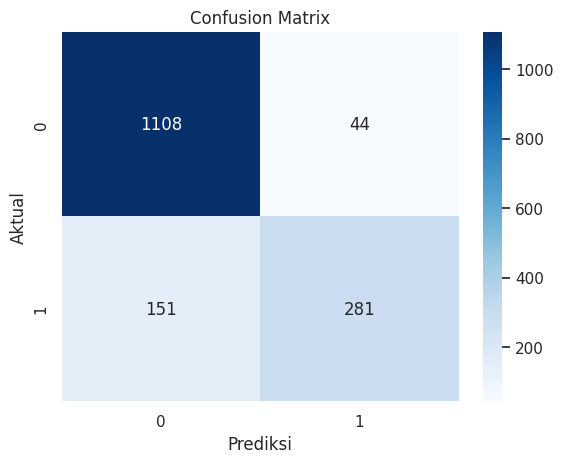

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()


## Data Evaluasi

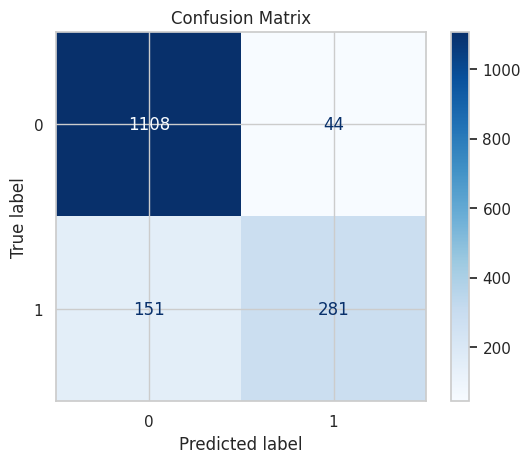

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1152
           1       0.86      0.65      0.74       432

    accuracy                           0.88      1584
   macro avg       0.87      0.81      0.83      1584
weighted avg       0.88      0.88      0.87      1584



## Data Prediksi

In [19]:
new_tweets = [
    "I really love my new iPhone, the camera is awesome!",
    "This update is terrible, my phone keeps crashing!",
    "Samsung and Apple both make great products.",
    "I hate waiting for software updates!",
    "What an amazing experience using this phone!"
]

new_tweets_clean = [preprocess_text(tweet) for tweet in new_tweets]

new_tweets_tfidf = vectorizer.transform(new_tweets_clean)

predictions = model.predict(new_tweets_tfidf)

for tweet, label in zip(new_tweets, predictions):
    sentiment = "Positif 😊" if label == 0 else "Negatif 😠"
    print(f"Teks: {tweet}\n=> Hasil Prediksi: {sentiment}\n")


Teks: I really love my new iPhone, the camera is awesome!
=> Hasil Prediksi: Positif 😊

Teks: This update is terrible, my phone keeps crashing!
=> Hasil Prediksi: Negatif 😠

Teks: Samsung and Apple both make great products.
=> Hasil Prediksi: Positif 😊

Teks: I hate waiting for software updates!
=> Hasil Prediksi: Negatif 😠

Teks: What an amazing experience using this phone!
=> Hasil Prediksi: Positif 😊



In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
